In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm, PowerNorm
import seaborn as sns
%matplotlib inline

import cv2

from sklearn.preprocessing import StandardScaler

from scipy import signal

import plotly.offline as py
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)

In [4]:
train = pd.read_json("../data/train.json")
train["inc_angle"] = pd.to_numeric(train["inc_angle"], errors="coerce")

In [5]:
icebergs = train[train.is_iceberg==1].sample(n=9, random_state=987)
ships = train[train.is_iceberg==0].sample(n=9, random_state=456)

In [8]:
def process_train_data(data):
    #Create 3 bands having HH, HV and avg of both
    X_band_1=np.array([np.array(band).astype(np.float32).reshape(75, 75) for band in data["band_1"]])
    X_band_2=np.array([np.array(band).astype(np.float32).reshape(75, 75) for band in data["band_2"]])
    X_band_avg = (X_band_1+X_band_2)/2

    print X_band_avg.shape

    # standardize data
    _mean = X_band_avg.mean()
    _std = X_band_avg.std()
    standardized = (X_band_avg - _mean) / (_std * 1.0)

    scaler = StandardScaler()
    tshape = X_band_1.shape

    scaled = scaler.fit_transform(X_band_avg.reshape(1, -1))
    scaled = scaled.reshape(tshape)

    print("scaled shape:", scaled.shape, 75*75)

    print(np.median(standardized))
    print(standardized.mean())


    print
    print(np.median(scaled))
    print(scaled.mean())

    layer_list = [X_band_1[..., np.newaxis],      # 0
                  X_band_2[..., np.newaxis],      # 1
                  X_band_avg[..., np.newaxis]]    # 2

    processed = np.concatenate(layer_list, axis=-1)
    
    return processed

In [9]:
icebergs = process_train_data(icebergs)
ships = process_train_data(ships)

(9, 75, 75)
('scaled shape:', (9, 75, 75), 5625)
-0.0598777
2.82419e-07

0.0
0.0
(9, 75, 75)
('scaled shape:', (9, 75, 75), 5625)
-0.211769
3.94242e-07

0.0
0.0


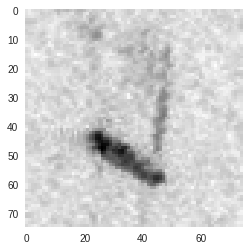

In [13]:
fig, ax = plt.subplots()
ax.grid(b="off")
ax.imshow(ships[0, ..., 0])

In [30]:
# res = np.array([cv2.resize(ship,None,fx=1.5, fy=1.5, interpolation = cv2.INTER_CUBIC) for ship in ships])
_mean = ship.mean()

M = cv2.getRotationMatrix2D((75/2,75/2),45,1)
# dst = cv2.warpAffine(img,M,(cols,rows))
res = np.array([cv2.warpAffine(ship, M, (75, 75)) for ship in ships])

res[res == 0] = _mean

print(res.shape)

(9, 75, 75, 3)


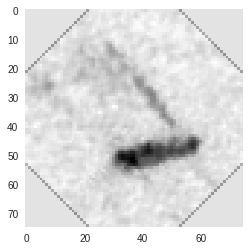

In [31]:
fig, ax = plt.subplots()
ax.grid(b="off")
ax.imshow(res[0, ..., 0])

In [25]:
def plotmy3d(c, name):

    data = [
        go.Surface(
            z=c
        )
    ]
    layout = go.Layout(
        title=name,
        autosize=False,
        width=700,
        height=700,
        margin=dict(
            l=65,
            r=50,
            b=65,
            t=90
        )
    )
    fig = go.Figure(data=data, layout=layout)
    py.iplot(fig)


In [179]:
plotmy3d(ships[3, ..., 2], 'untouched ship')

In [56]:
info = []

for x in range(100):
    _exp = (np.random.uniform(-8.5, -6.5))
    
    info.append("{:0.8f}".format(4**_exp))

print sorted(info)

['0.00000814', '0.00000822', '0.00000836', '0.00000843', '0.00000849', '0.00000903', '0.00000921', '0.00000932', '0.00000933', '0.00000958', '0.00000964', '0.00001072', '0.00001112', '0.00001142', '0.00001170', '0.00001208', '0.00001241', '0.00001291', '0.00001327', '0.00001416', '0.00001441', '0.00001593', '0.00001594', '0.00001610', '0.00001651', '0.00001682', '0.00001693', '0.00001728', '0.00001797', '0.00001986', '0.00002071', '0.00002078', '0.00002101', '0.00002113', '0.00002182', '0.00002231', '0.00002374', '0.00002390', '0.00002421', '0.00002507', '0.00002524', '0.00002555', '0.00002669', '0.00002852', '0.00002885', '0.00002939', '0.00002962', '0.00003007', '0.00003058', '0.00003088', '0.00003092', '0.00003117', '0.00003217', '0.00003246', '0.00003495', '0.00003654', '0.00003771', '0.00003904', '0.00003910', '0.00003950', '0.00004208', '0.00004311', '0.00004436', '0.00004468', '0.00004529', '0.00004577', '0.00004726', '0.00005045', '0.00005123', '0.00005181', '0.00005378', '0.00

In [57]:
np.random.randint(0, 4)

1

In [171]:
# temp = np.array([cv2.resize(ship,None,fx=2, fy=2, interpolation = cv2.INTER_CUBIC) for ship in ships])

blur = np.array([cv2.medianBlur(ship,3) for te in temp])

blur = np.array([cv2.bilateralFilter(te, 9,15,15) for te in temp])

In [181]:
plotmy3d(blur[0, ..., 0], 'no scale blur ship')

In [152]:
temp2 = np.array([cv2.resize(ship,None,fx=2, fy=2, interpolation = cv2.INTER_CUBIC) for ship in ships])

_median = np.median(temp)

_percentile = np.percentile(temp, 80)

print("median", _median)

temp2[temp2 < _median] = _median

blur2 = np.array([cv2.medianBlur(blur, 5) for blur in temp2])

blur2 = np.array([cv2.bilateralFilter(te, 25,45,45) for te in blur2])


print("percentile", np.percentile(ships, 80))


('median', -23.847771)
('percentile', -18.844182205200191)


In [182]:
plotmy3d(blur2[0, ..., 0], 'blurred ship')

In [184]:
temp3 = np.array([cv2.resize(ship,None,fx=2, fy=2, interpolation = cv2.INTER_CUBIC) for ship in ships])

_median = np.median(temp3)

_percentile = np.percentile(temp3, 60)

print("median", _median)
print("percentile", _percentile)

temp3[temp3 < _percentile] = _percentile

blur3 = np.array([cv2.medianBlur(blur, 5) for blur in temp3])

blur3 = np.array([cv2.bilateralFilter(te, 25,45,45) for te in blur3])

blur3 = np.array([cv2.resize(blu,None,fx=0.5, fy=0.5, interpolation = cv2.INTER_CUBIC) for blu in blur3])

('median', -23.847771)
('percentile', -22.787196731567384)


In [186]:
plotmy3d(blur3[3, ..., 0], '2x blurred ship')